In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from collections import defaultdict

In [2]:
m3 = pd.read_csv('Strip_comparison.csv')
orthoclase = pd.read_csv('lunar_analog_spectra/Pyroxene lab spectra FDL/USGS orthoclase spliced.csv')

In [3]:
# boundaries: 
# m^3
# 0.43 - 3 microns
# 430 - 3000 nanometers
# trailblazer
# 0.6 microns - 3.6
# 600 nm - 3600 nanometers

# bin methods
# linear, gaussian, any others to find

# m3 wavelength is band center
STEPSIZE = 0.04

# TODO

# step size until 1.57 microns
# STEPSIZE_PRE = 0.04
# step size after 1.57 microns 
# STEPSIZE_POST = 0.04

# consider using window of band_center +- stepsize allowing for overlap rather than bins

# truncate to m^3 range

In [4]:
m3.head()

,Step Size,Wavelength (µm),"Strip 325 330, morning/midday, lat 30 - Back","Strip 325 330, morning/midday, lat 30","Strip 325 330, morning/midday, lat 0 - Back","Strip 325 330, morning/midday, lat 0","Strip 325 330, morning/midday, lat -30 - Back","Strip 325 330, morning/midday, lat -30","Strip 295 305, morning/midday, lat 60 - Back","Strip 295 305, morning/midday, lat 60",...,"Strip 295 305, morning/midday, lat 30","Strip 295 305, morning/midday, lat 0 - Back","Strip 295 305, morning/midday, lat 0","Strip 295 305, morning/midday, lat -30 - Back","Strip 295 305, morning/midday, lat -30","Strip 240 250, morning/midday, lat 60 - Back","Strip 240 250, morning/midday, lat 60","Strip 240 250, morning/midday, lat 30 - Back","Strip 240 250, morning/midday, lat 30","Back = Strip 240 250, morning/midday, lat -30"
0,0.03993,0.46099,-0.020805,0.73383,0.007319,0.76196,0.20118,0.95581,0.15679,0.91143,...,0.89989,0.030394,0.78503,0.086746,0.84138,2.282000e-01,9.828400e-01,0.077972,0.83261,0.75464
1,0.03992,0.50092,-0.070086,0.84618,-0.051590,0.86467,0.16634,1.08260,0.14971,1.06600,...,1.04090,-0.025042,0.89122,0.049061,0.96532,3.400000e+38,3.400000e+38,0.069836,0.98610,0.91626
2,0.03992,0.54084,-0.110560,0.84613,-0.089018,0.86767,0.14826,1.10500,0.11678,1.07350,...,1.00360,-0.075746,0.88095,0.031726,0.98842,3.400000e+38,3.400000e+38,0.034699,0.99139,0.95669
3,0.03993,0.58076,-0.110600,0.86259,-0.090397,0.88279,0.12067,1.09390,0.10629,1.07950,...,0.99137,-0.109050,0.86414,0.028246,1.00140,9.577900e-02,1.069000e+00,0.031362,1.00450,0.97319
4,0.03992,0.62069,-0.099762,0.85225,-0.073678,0.87833,0.11705,1.06910,0.10626,1.05830,...,0.98712,-0.091118,0.86089,0.035011,0.98702,1.027800e-01,1.054800e+00,0.037839,0.98985,0.95201


In [5]:
orthoclase.head()

,Wavelength (nm),Orthoclase nmn h142137.17349 spliced
0,297.1,0.29242
1,301.1,0.32803
2,305.1,0.36140
3,309.1,0.39275
4,313.1,0.41984


In [6]:
band_centers = (m3['Wavelength (µm)'] + STEPSIZE/2).tolist()
band_centers = [f"{band:.5f}" for band in band_centers]
print(f"# of band centers {len(band_centers)}, first 5 {band_centers[:5]}")

# of band centers 84, first 5 ['0.48099', '0.52092', '0.56084', '0.60076', '0.64069']


In [7]:
orthoclase['Wavelength (µm)'] = orthoclase['Wavelength (nm)']/1000
orthoclase = orthoclase.set_index('Wavelength (µm)')
orthoclase.head(-5)

,Wavelength (nm),Orthoclase nmn h142137.17349 spliced
Wavelength (µm),,
0.2971,297.1,0.29242
0.3011,301.1,0.32803
0.3051,305.1,0.36140
0.3091,309.1,0.39275
0.3131,313.1,0.41984
...,...,...
3.9725,3972.5,0.74158
3.9756,3975.6,0.74164
3.9786,3978.6,0.74177


In [8]:
# bins stored as strings
binned_orthoclase = defaultdict(list)
for center in band_centers:
    binned_orthoclase[center] = []
len(binned_orthoclase)

84

In [9]:
# assign points to binned_orthoclase lists
# average points across list
c = 0
# nextbin = float(band_centers[c])
for orthoclase_wl in orthoclase.index: # list of orthoclase point wavelengths 
    # print(f"x {x}, band center {nextbin}, upper bound of bin {nextbin + STEPSIZE/2}")

    if orthoclase_wl <= float(band_centers[c]) + STEPSIZE/2:
        binned_orthoclase[band_centers[c]].append(orthoclase_wl)
    else:
        # if next bin is not out of bounds, increment nextbin
        if c + 1 < len(band_centers):
            c += 1
        
        binned_orthoclase[band_centers[c]].append(orthoclase_wl)
print(f"bands covered: {c}, {len(binned_orthoclase)}, orthoclase wls {len(orthoclase.index)}")

bands covered: 83, 84, orthoclase wls 1701


In [10]:
# average all orthoclase wavelength values in the same bin

# for every bin in binned_orthoclase
#   for every x value in bin
#       find orthoclase reflectance value
#       increment over number of points in bin

averaged_orthoclase_wl = []
for c, bin in enumerate(binned_orthoclase):
    # iterate over m3 bins
    # if no orthoclase datapoints in m3 bin, continue
    # append -1
    if len(binned_orthoclase[bin]) == 0:
        averaged_orthoclase_wl.append(-1)
        continue

    avg = 0
    # print(bin)
    # print(binned_orthoclase[bin])

    # average over all orthoclase reflectance values
    for wavelength in binned_orthoclase[bin]:
        avg += orthoclase.loc[wavelength]['Orthoclase nmn h142137.17349 spliced']
    averaged_orthoclase_wl.append(avg / len(binned_orthoclase[bin]))

print(f"# of average reflectance values {len(averaged_orthoclase_wl)}, first 5 of averaged points {averaged_orthoclase_wl[:5]}")

# of average reflectance values 84, first 5 of averaged points [0.6355974025974025, 0.7346230000000001, 0.7476295000000002, 0.7563417391304348, 0.7629038095238097]


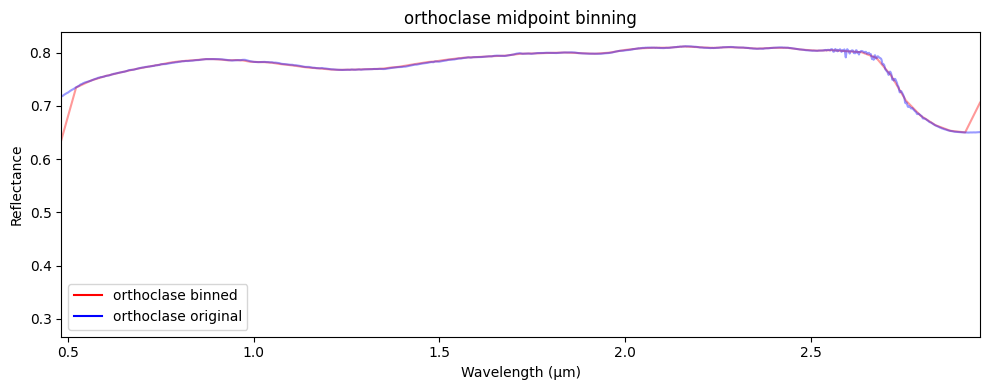

In [13]:
x = [float(band) for band in band_centers]
ax = sns.lineplot(
    x = x, 
    y = averaged_orthoclase_wl, 
    label = "orthoclase binned",
    color = "red",
)

ax = sns.lineplot(
    x = orthoclase.index, 
    y = orthoclase['Orthoclase nmn h142137.17349 spliced'], 
    label = "orthoclase original",
    color = 'blue',
)
for line in ax.lines:
    line.set_alpha(0.4)


plot.title('orthoclase midpoint binning')
plot.xlabel('Wavelength (µm)')
plot.ylabel('Reflectance')

plot.rcParams['figure.figsize'] = (10,4)
plot.xlim(x[0], x[-1])
plot.tight_layout()
# plot.savefig('Graphs/orthoclase midpoint binning.png', bbox_inches='tight', dpi = 1000)
plot.show()